# Pair Programming Visualización III

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.  

En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.   

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

1. Nuestro Usando la librería seaborn, cread una gráfica que nos muestre el número de personas que han hecho una solicitud de ticket en cada año. Hacedlo solo para los del tipo "Problema".

In [14]:
df_años = pd.read_csv('../pandas/datos/años.csv', index_col=0) 
df_años.head()

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0
3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0


In [15]:
df_años['Fecha'] = df_años['Fecha'].apply(pd.to_datetime) 

In [16]:
def sacar_año(x):
    try:
        return x.strftime('%Y')
    except:
        return x

In [17]:
df_años['Año'] = df_años['Fecha'].apply(sacar_año)
df_años.head()

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,Año
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016
3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0,2016
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016


In [18]:
df_problema = df_años[df_años['Tipo'] == 'Problema']
df_problema.head()

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,Año
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016


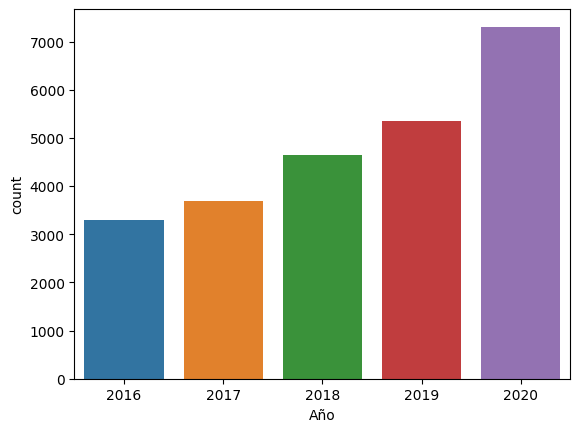

In [19]:
plt.figure()
fig = sns.countplot(x='Año', data=df_problema)
plt.show()

2. La gráfica anterior nos ha mostrado una tendencia ascendente en el número de solicitudes a lo largo de los años, lo que preocupa a la empresa, por lo que quieres seguir analizando los datos para ver si son capaces de identificar los problemas subyacentes a estas solicitudes. Para esto, quieren saber si hay diferencias a lo largo del año. En concreto nos piden que hagamos un subplot con seaborn donde:  
    - En la primera gráfica tengamos la gráfica que creamos en el ejercicio anterior
    - En la segunda gráfica tengamos la comparación por años y semestres para el número de tikects de tipo "Problema".

In [23]:
df_años['Fecha'].dt.month

0         7.0
1         5.0
2         6.0
3         4.0
4         6.0
         ... 
97493     2.0
97494     9.0
97495     1.0
97496    11.0
97497     6.0
Name: Fecha, Length: 97498, dtype: float64

In [29]:
# lo aplicamos sobre el df completo por si no hiciera falta más adelante
condicion = df_años['Fecha'].dt.month < 7
df_años['Semestre'] = np.where(condicion, '1er semestre', '2º semestre')
df_años.sample(5)

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,Año,Semestre
28396,GDLTER-1543226920,2018-05-06,352.0,29.0,Software,Solicitud,2 - Normal,0 - Sin Asignar,5.0,5.0,2018,1er semestre
10318,SWLTNR-2242664231,2016-10-21,753.0,32.0,Acceso&%Login,Solicitud,2 - Normal,1 - Baja,2.0,4.0,2016,2º semestre
19797,KHLTNT-7042944000,2017-07-28,720.0,40.0,Acceso%&Login,Solicitud,2 - Normal,3 - Alta,0.0,5.0,2017,2º semestre
20301,KHREET-8643077211,2017-12-08,1411.0,42.0,Software,Problema,1 - Menor,3 - Alta,1.0,4.0,2017,2º semestre
29779,GHLEER-4343414928,2018-11-10,322.0,9.0,Software,Problema,2 - Normal,3 - Alta,3.0,5.0,2018,2º semestre


In [30]:
df_prob_sem = df_años[df_años['Tipo'] == 'Problema']
df_prob_sem.head()

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,Año,Semestre
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1er semestre
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1er semestre
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1er semestre
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016,2º semestre


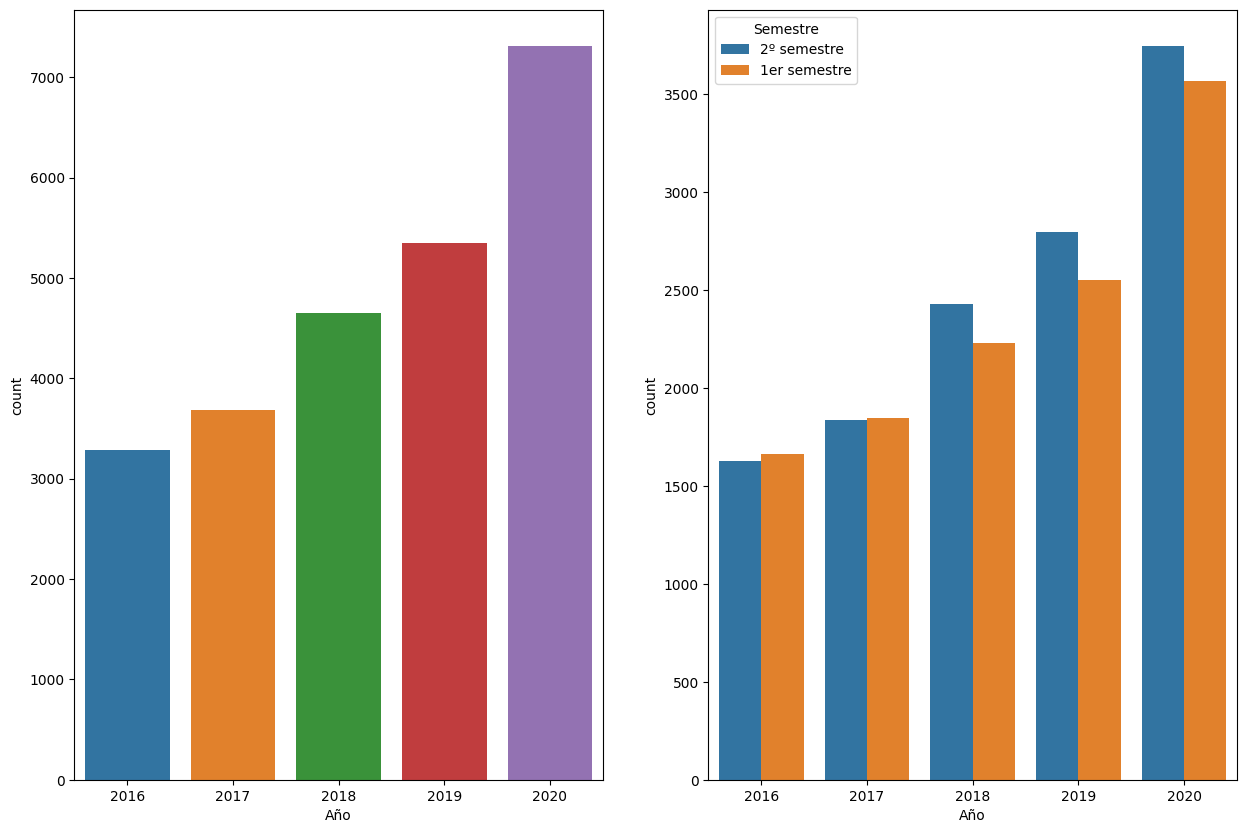

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15, 10))
sns.countplot(x='Año', data=df_prob_sem, ax=axes[0])
sns.countplot(x='Año', data=df_prob_sem, ax=axes[1], hue='Semestre')
plt.show()

3. La empresa se siente algo aliviada al ver que no hay diferencias entre semestres, pero seguimos sin identificar porque cada año tenemos más solicitudes. Nuestras jefas quieren saber ahora, que prioridad tienen los tickets que tenemos en el conjunto de datos. Por eso nos piden que volvamos a hacer un subplot:  

    - En la primera gráfica deberíamos tener la gráfica creada en el ejercicio 1
    - En la segunda gráfica deberíamos incluir el número de tickets por año en función de la prioridad que tienen.

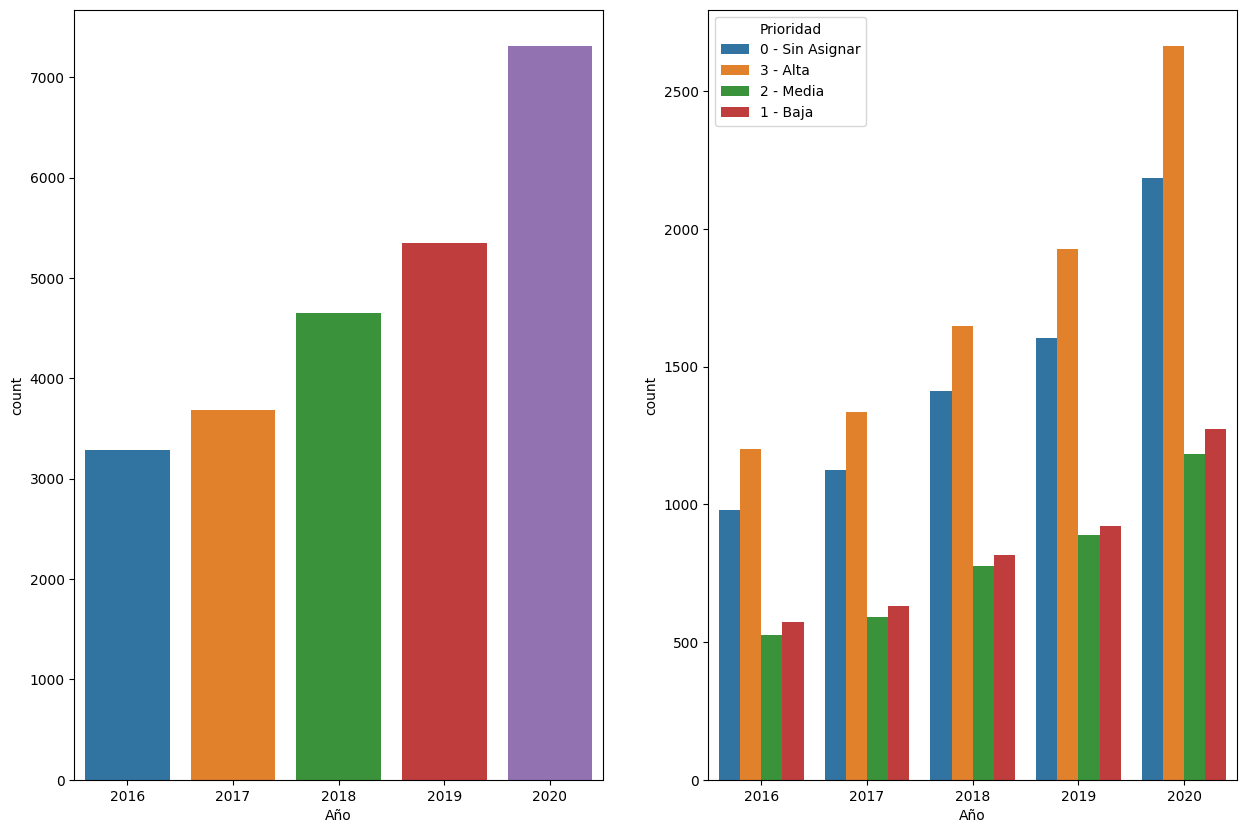

In [36]:
fig, axes = plt.subplots(1,2, figsize=(15, 10))
sns.countplot(x='Año', data=df_prob_sem, ax=axes[0])
sns.countplot(x='Año', data=df_prob_sem, ax=axes[1], hue='Prioridad')
plt.show()

4. Hasta ahora hemos estado viendo que no parece que haya nada alarmante. Por lo que ahora quieren que evaluemos la cantidad de trabajo que cada empleado esta haciendo, para poder identificar rápidamente un problema en la distribución de tareas y tomar medidas para solucionarlo. Para ello nos piden que hagamos dos gráficas en un subplot:  

    - La primera gráfica tiene que tener los 5 empleados con mayor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.
    - La primera gráfica tiene que tener los 5 empleados con menor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.

In [38]:
df_prob_sem.head()

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,Año,Semestre
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1er semestre
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1er semestre
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1er semestre
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016,2º semestre


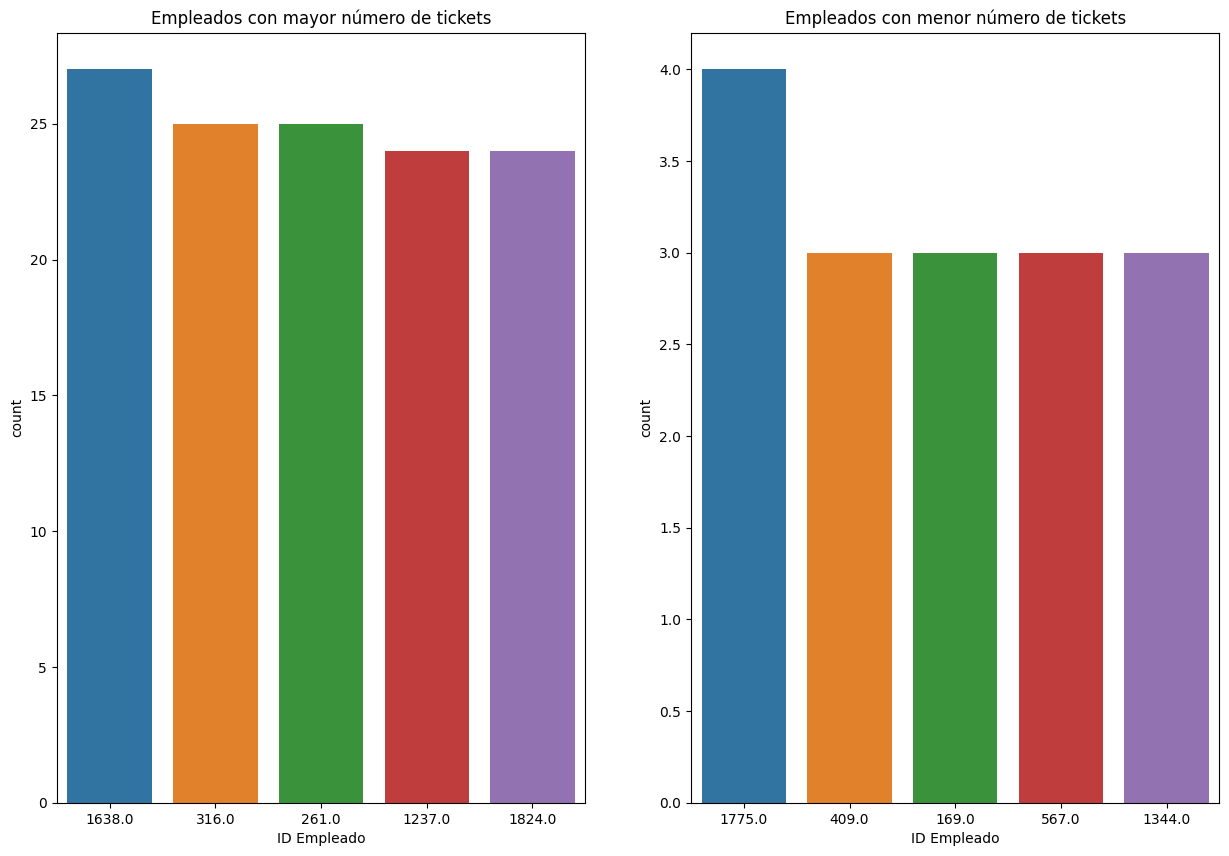

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15, 10))
sns.countplot(x='ID Empleado', data=df_prob_sem, order=df_prob_sem['ID Empleado'].value_counts().iloc[:5].index, ax=axes[0])
sns.countplot(x='ID Empleado', data=df_prob_sem, order=df_prob_sem['ID Empleado'].value_counts().iloc[-5:].index, ax=axes[1])
axes[0].set_title('Empleados con mayor número de tickets') 
axes[1].set_title('Empleados con menor número de tickets') 
plt.show()